# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


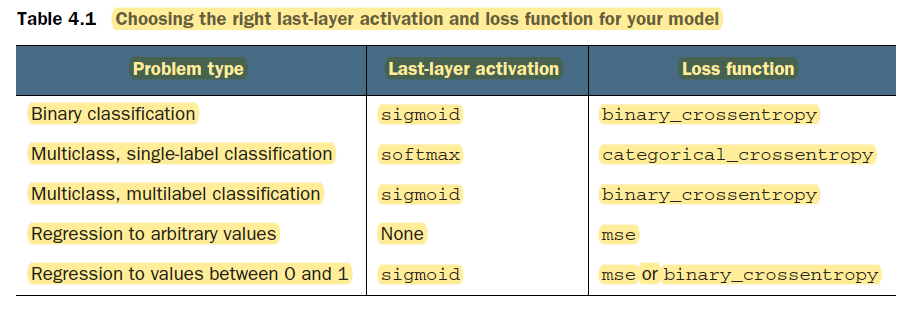

# Task::

## Identify fraudulent credit card transactions.

In [2]:
import pandas as pd
import numpy as np
#import keras
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
credit_df = pd.read_csv('creditcard.csv')

In [4]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check how many categories present in each Column
cat_list = []
count = 0
for col in credit_df.columns:
    if credit_df[col].dtype == 'O' and col != 'Class':
        print(len(credit_df[col].unique())," lablels in ",col)
        cat_list.append(col)
        count += len(credit_df[col].unique())

count

0

# Correlation

<AxesSubplot:>

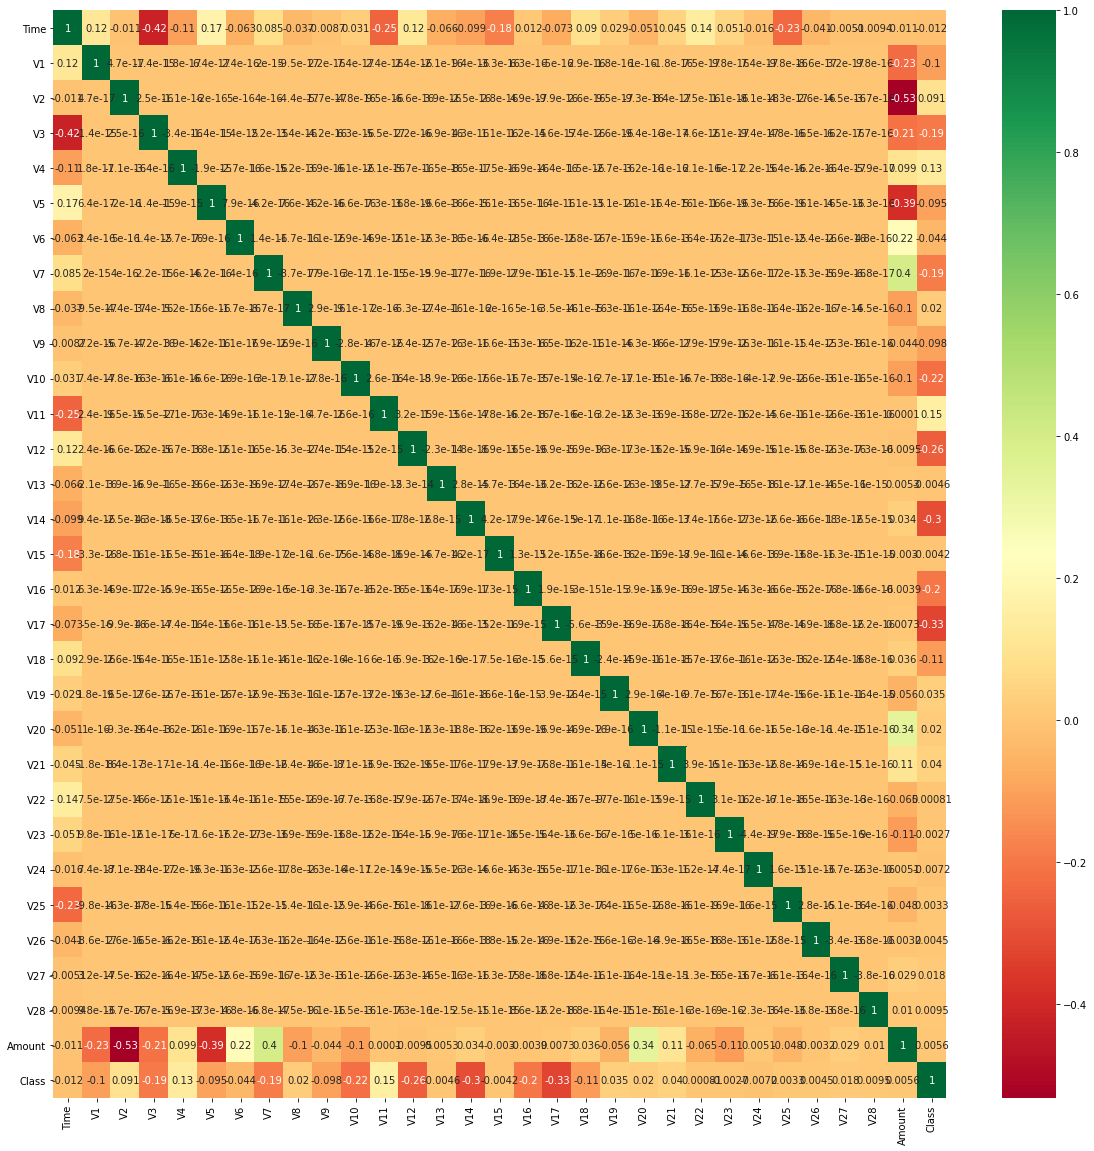

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(),annot=True,cmap="RdYlGn")

In [8]:
credit_df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

# Select Features with High Corelation

In [9]:
credit = credit_df[['V11','V4','V7','V3','V16','V10','V12','V14','V17','Class']]

In [10]:
credit.head()

,V11,V4,V7,V3,V16,V10,V12,V14,V17,Class
0,-0.551600,1.378155,0.239599,2.536347,-0.470401,0.090794,-0.617801,-0.311169,0.207971,0
1,1.612727,0.448154,-0.078803,0.166480,0.463917,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.624501,0.379780,0.791461,1.773209,-2.890083,0.207643,0.066084,-0.165946,1.109969,0
3,-0.226487,-0.863291,0.237609,1.792993,-1.059647,-0.054952,0.178228,-0.287924,-0.684093,0
4,-0.822843,0.403034,0.592941,1.548718,-0.451449,0.753074,0.538196,-1.119670,-0.237033,0


array([[<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

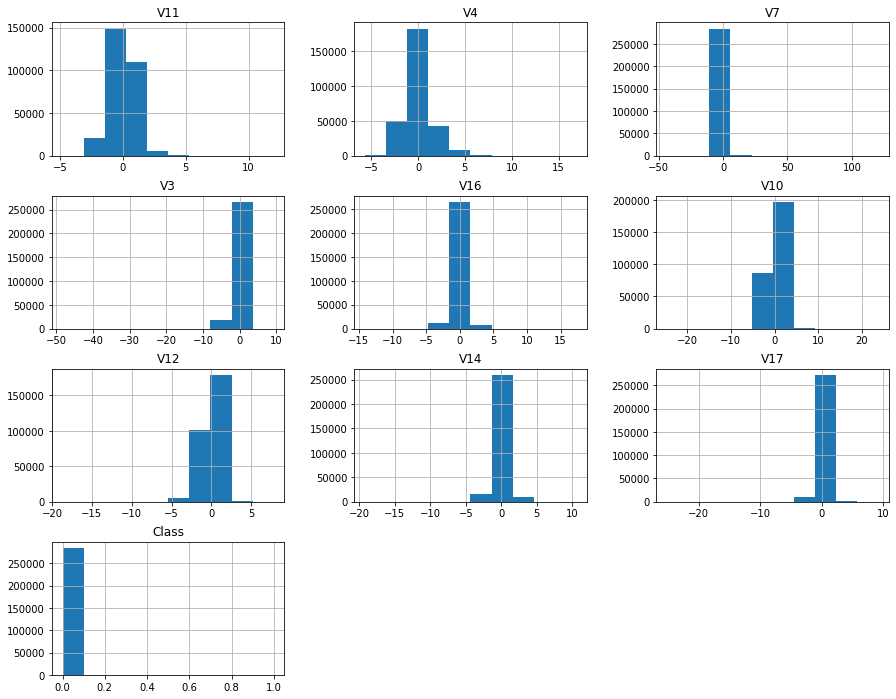

In [11]:
credit.hist(figsize=(15,12))

In [12]:
credit['Class'].unique()

array([0, 1], dtype=int64)

In [13]:
credit[credit['Class'] == 1].Class.count()

492

In [14]:
credit[credit['Class'] == 0].Class.count()

284315

# Cater Imbalanced Class column via SMOTE
### (Synthetic Minority Oversampling Technique)

In [15]:
x = (credit.loc[:, credit.columns != 'Class'])
y = (credit.loc[:, credit.columns == 'Class'])

In [16]:
x.shape

(284807, 9)

In [17]:
from imblearn.over_sampling import SMOTE

In [22]:
smo = SMOTE(sampling_strategy='minority')

In [23]:
x_smo, y_smo = smo.fit_resample(x, y)

In [24]:
x_smo.shape

(568630, 9)

Text(0.5, 1.0, 'After')

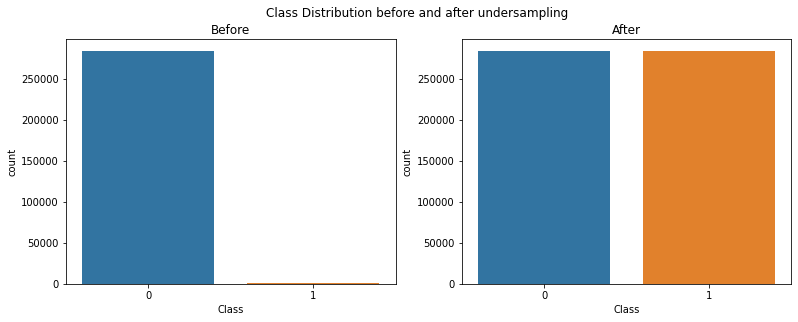

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit, ax=axs[0])
sns.countplot(x="Class", data=y_smo, ax=axs[1])

fig.suptitle("Class Distribution before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

# Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x_smo, y_smo, test_size=0.30, random_state=1)  # chnaged from 42

# Split 15% Test into further 30% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(398041, 9)
(85294, 9)
(85295, 9)


In [30]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(398041, 1)
(85294, 1)
(85295, 1)


# Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [27]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.transform(x_test)
x_val_s = min_max_scaler.transform(x_val)

In [28]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(398041, 9)
(85294, 9)
(85295, 9)


# Build & Train Model

In [32]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=9))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [33]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
hist = model.fit(
    x_train_s, y_train, epochs = 100, batch_size=16,
    validation_data = (x_val_s, y_val)
)

Epoch 1/100
24646/24878 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9348 ETA: 1s - loss: 0.1647 - 

### Check Model's Accuracy and Loss against Validation Data

In [38]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

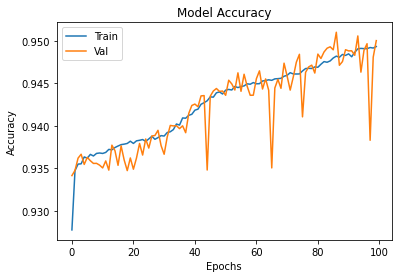

In [39]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

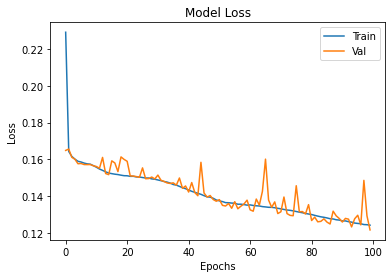

In [40]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase neurons)

In [41]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [42]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [43]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1941 - accuracy: 0.9291 - val_loss: 0.1691 - val_accuracy: 0.9325
Epoch 2/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1611 - accuracy: 0.9351 - val_loss: 0.1616 - val_accuracy: 0.9362
Epoch 3/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1592 - accuracy: 0.9361 - val_loss: 0.1581 - val_accuracy: 0.9366
Epoch 4/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1584 - accuracy: 0.9363 - val_loss: 0.1591 - val_accuracy: 0.9348
Epoch 5/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1576 - accuracy: 0.9364 - val_loss: 0.1604 - val_accuracy: 0.9350
Epoch 6/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1571 - accuracy: 0.9367 - val_loss: 0.1571 - val_accuracy: 0.9351
Epoch 7/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1563 - accuracy: 0.9367 - val_

12439/12439 [==============================] - 19s 2ms/step - loss: 0.1332 - accuracy: 0.9465 - val_loss: 0.1314 - val_accuracy: 0.9475
Epoch 57/200
12439/12439 [==============================] - 19s 1ms/step - loss: 0.1330 - accuracy: 0.9465 - val_loss: 0.1340 - val_accuracy: 0.9458
Epoch 58/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1328 - accuracy: 0.9463 - val_loss: 0.1305 - val_accuracy: 0.9477
Epoch 59/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1325 - accuracy: 0.9465 - val_loss: 0.1328 - val_accuracy: 0.9458
Epoch 60/200
12439/12439 [==============================] - 19s 1ms/step - loss: 0.1324 - accuracy: 0.9469 - val_loss: 0.1361 - val_accuracy: 0.9446
Epoch 61/200
12439/12439 [==============================] - 19s 1ms/step - loss: 0.1321 - accuracy: 0.9468 - val_loss: 0.1309 - val_accuracy: 0.9469
Epoch 62/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1319 - accuracy: 0.9468 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 19s 1ms/step - loss: 0.1243 - accuracy: 0.9482 - val_loss: 0.1218 - val_accuracy: 0.9487
Epoch 112/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1239 - accuracy: 0.9484 - val_loss: 0.1224 - val_accuracy: 0.9489
Epoch 113/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1238 - accuracy: 0.9484 - val_loss: 0.1216 - val_accuracy: 0.9489
Epoch 114/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1237 - accuracy: 0.9483 - val_loss: 0.1232 - val_accuracy: 0.9482
Epoch 115/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1235 - accuracy: 0.9483 - val_loss: 0.1213 - val_accuracy: 0.9480
Epoch 116/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1234 - accuracy: 0.9483 - val_loss: 0.1244 - val_accuracy: 0.9476
Epoch 117/200
12439/12439 [==============================] - 19s 2ms/step - loss: 0.1231 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [44]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

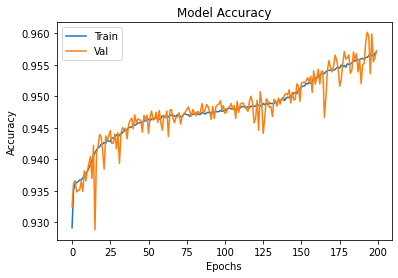

In [45]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

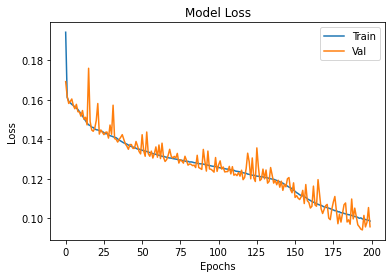

In [46]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layers)

In [47]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dropout(0.5))
model.add(Dense(units = 12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [48]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [49]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.3590 - accuracy: 0.8321 - val_loss: 0.1667 - val_accuracy: 0.9336
Epoch 2/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2405 - accuracy: 0.9034 - val_loss: 0.1565 - val_accuracy: 0.9377
Epoch 3/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2280 - accuracy: 0.9094 - val_loss: 0.1634 - val_accuracy: 0.9340
Epoch 4/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2215 - accuracy: 0.9144 - val_loss: 0.1575 - val_accuracy: 0.9389
Epoch 5/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2155 - accuracy: 0.9198 - val_loss: 0.1588 - val_accuracy: 0.9386
Epoch 6/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2127 - accuracy: 0.9202 - val_loss: 0.1581 - val_accuracy: 0.9408
Epoch 7/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.2106 - accuracy: 0.9209 - val_

12439/12439 [==============================] - 20s 2ms/step - loss: 0.1886 - accuracy: 0.9320 - val_loss: 0.1616 - val_accuracy: 0.9396
Epoch 57/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1890 - accuracy: 0.9318 - val_loss: 0.1659 - val_accuracy: 0.9422
Epoch 58/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1881 - accuracy: 0.9322 - val_loss: 0.1600 - val_accuracy: 0.9432
Epoch 59/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1887 - accuracy: 0.9321 - val_loss: 0.1585 - val_accuracy: 0.9428
Epoch 60/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1879 - accuracy: 0.9322 - val_loss: 0.1613 - val_accuracy: 0.9417
Epoch 61/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1881 - accuracy: 0.9323 - val_loss: 0.1655 - val_accuracy: 0.9397
Epoch 62/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1880 - accuracy: 0.9323 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1856 - accuracy: 0.9335 - val_loss: 0.1557 - val_accuracy: 0.9463
Epoch 112/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1862 - accuracy: 0.9330 - val_loss: 0.1640 - val_accuracy: 0.9367
Epoch 113/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1861 - accuracy: 0.9331 - val_loss: 0.1620 - val_accuracy: 0.9456
Epoch 114/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1862 - accuracy: 0.9330 - val_loss: 0.1526 - val_accuracy: 0.9467
Epoch 115/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1862 - accuracy: 0.9330 - val_loss: 0.1630 - val_accuracy: 0.9452
Epoch 116/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1855 - accuracy: 0.9333 - val_loss: 0.1597 - val_accuracy: 0.9466
Epoch 117/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1862 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [50]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

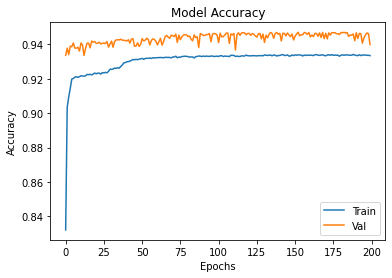

In [51]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

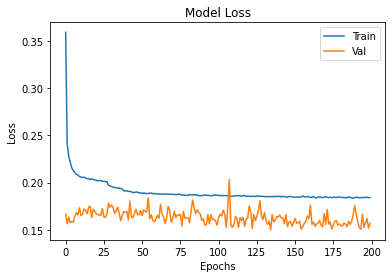

In [52]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Retune Model (use adam optimizer)

In [53]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [54]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [55]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1820 - accuracy: 0.9268 - val_loss: 0.1606 - val_accuracy: 0.9333
Epoch 2/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1603 - accuracy: 0.9348 - val_loss: 0.1585 - val_accuracy: 0.9354
Epoch 3/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1591 - accuracy: 0.9356 - val_loss: 0.1633 - val_accuracy: 0.9362
Epoch 4/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1585 - accuracy: 0.9359 - val_loss: 0.1575 - val_accuracy: 0.9352
Epoch 5/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1578 - accuracy: 0.9360 - val_loss: 0.1683 - val_accuracy: 0.9349
Epoch 6/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1565 - accuracy: 0.9362 - val_loss: 0.1624 - val_accuracy: 0.9345
Epoch 7/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1537 - accuracy: 0.9371 - val_

12439/12439 [==============================] - 20s 2ms/step - loss: 0.0944 - accuracy: 0.9607 - val_loss: 0.1003 - val_accuracy: 0.9580
Epoch 57/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0941 - accuracy: 0.9610 - val_loss: 0.0919 - val_accuracy: 0.9611
Epoch 58/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0929 - accuracy: 0.9614 - val_loss: 0.0908 - val_accuracy: 0.9628
Epoch 59/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0918 - accuracy: 0.9618 - val_loss: 0.0878 - val_accuracy: 0.9645
Epoch 60/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0906 - accuracy: 0.9620 - val_loss: 0.0892 - val_accuracy: 0.9644
Epoch 61/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0905 - accuracy: 0.9620 - val_loss: 0.0849 - val_accuracy: 0.9625
Epoch 62/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0895 - accuracy: 0.9627 - val_loss: 

Epoch 111/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0719 - accuracy: 0.9697 - val_loss: 0.0885 - val_accuracy: 0.9646
Epoch 112/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0719 - accuracy: 0.9698 - val_loss: 0.0712 - val_accuracy: 0.9677
Epoch 113/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0714 - accuracy: 0.9697 - val_loss: 0.0655 - val_accuracy: 0.9722
Epoch 114/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0713 - accuracy: 0.9700 - val_loss: 0.0772 - val_accuracy: 0.9654
Epoch 115/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0713 - accuracy: 0.9697 - val_loss: 0.0697 - val_accuracy: 0.9699
Epoch 116/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0708 - accuracy: 0.9699 - val_loss: 0.0655 - val_accuracy: 0.9726
Epoch 117/200
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0710 - accuracy:

### Check Model's Accuracy and Loss against Validation Data

In [56]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

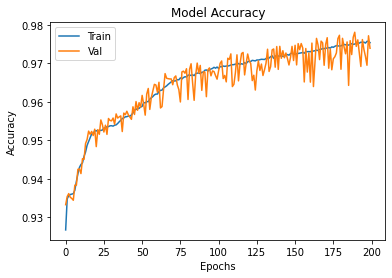

In [57]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

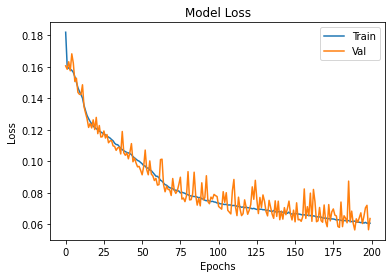

In [58]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (4) Final Model

In [59]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [60]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [61]:
hist = model.fit(
    x_train_s, y_train, epochs = 100,
    validation_data = (x_val_s, y_val)
)

Epoch 1/100
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1739 - accuracy: 0.9302 - val_loss: 0.1679 - val_accuracy: 0.9337
Epoch 2/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1575 - accuracy: 0.9356 - val_loss: 0.1565 - val_accuracy: 0.9367
Epoch 3/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1546 - accuracy: 0.9365 - val_loss: 0.1572 - val_accuracy: 0.9338
Epoch 4/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1523 - accuracy: 0.9374 - val_loss: 0.1500 - val_accuracy: 0.9394
Epoch 5/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1479 - accuracy: 0.9399 - val_loss: 0.1452 - val_accuracy: 0.9406
Epoch 6/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1407 - accuracy: 0.9436 - val_loss: 0.1399 - val_accuracy: 0.9439
Epoch 7/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1362 - accuracy: 0.9459 - val_

12439/12439 [==============================] - 20s 2ms/step - loss: 0.0798 - accuracy: 0.9692 - val_loss: 0.0862 - val_accuracy: 0.9665
Epoch 57/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0790 - accuracy: 0.9701 - val_loss: 0.0766 - val_accuracy: 0.9717
Epoch 58/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0783 - accuracy: 0.9702 - val_loss: 0.0732 - val_accuracy: 0.9725
Epoch 59/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0773 - accuracy: 0.9707 - val_loss: 0.0773 - val_accuracy: 0.9699
Epoch 60/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0775 - accuracy: 0.9706 - val_loss: 0.0729 - val_accuracy: 0.9737
Epoch 61/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0769 - accuracy: 0.9708 - val_loss: 0.0763 - val_accuracy: 0.9712
Epoch 62/100
12439/12439 [==============================] - 20s 2ms/step - loss: 0.0763 - accuracy: 0.9712 - val_loss: 

### Check Model's Accuracy and Loss against Validation Data

In [62]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

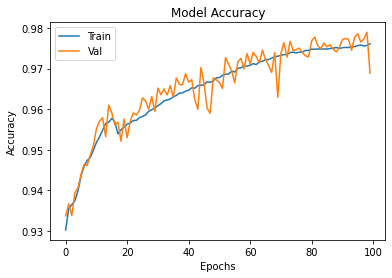

In [63]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

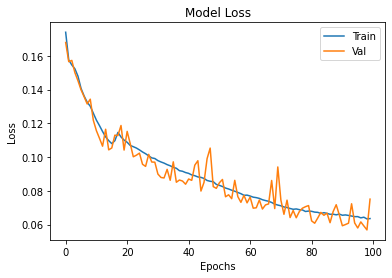

In [64]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Evaluate Accuracy of Data based on Test Data

In [65]:
model.evaluate(x_test_s, y_test)

2666/2666 [==============================] - 2s 849us/step - loss: 0.0729 - accuracy: 0.9704


[0.07290276885032654, 0.9704082608222961]

In [66]:
# Model Accuracy is 97.04%

### Do Predictions on Test Data

In [69]:
predictions = model.predict(x_test_s)
prediction2 = np.where(predictions>= 0.87, 1,0 )

In [70]:
print(len(predictions))
print(len(x_test_s))

221
221
